In [4]:
#No investment advice!
#video instructions: https://youtu.be/t4jrCnrpgdw
#& PartII: https://youtu.be/hTfja2lu5zY

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize##### imp.******
from scipy.optimize import Bounds

In [6]:
tickers = ['^GSPC','GC=F','TSLA','MMM']

In [7]:
df = yf.download(tickers,start='2010-01-01')['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [8]:
ret_df = np.log(df/df.shift(1)) #daily log returns

In [9]:
ret_df

Ticker,GC=F,MMM,TSLA,^GSPC
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000358,-0.006284,NaN,0.003111
2010-01-06,0.015795,0.014082,NaN,0.000545
2010-01-07,-0.002468,0.000717,NaN,0.003993
2010-01-08,0.004491,0.007022,NaN,0.002878
...,...,...,...,...
2024-08-26,0.003701,0.015285,-0.032803,-0.003159
2024-08-27,-0.000675,-0.003419,-0.018939,0.001594
2024-08-28,-0.005980,0.001597,-0.016677,-0.005994


In [10]:
ret_df.mean()

Ticker
GC=F     0.000237
MMM      0.000298
TSLA     0.001363
^GSPC    0.000433
dtype: float64

<Axes: xlabel='Date'>

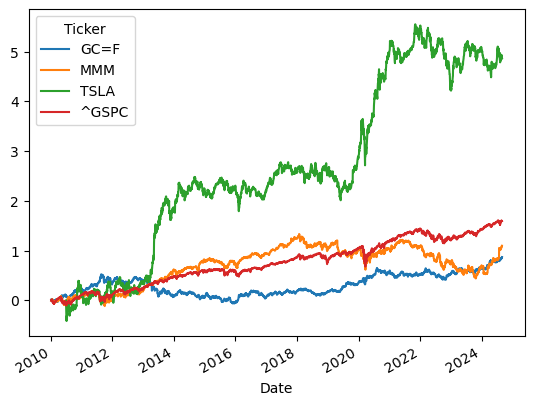

In [11]:
ret_df.cumsum().plot()

In [12]:
W = np.ones(len(ret_df.columns))/ np.ones(len(ret_df.columns)).sum() ##equal weights vector*****

In [13]:
ret_df.mean().dot(W)   #### Expected return

0.0005826258330411211

In [14]:
W.dot(ret_df.cov().dot(W))  #portfolio variance OR W.T.dot(ret_df.cov().dot(W)) (Transpose)*****

0.00015824155976386513

In [15]:
W.dot(ret_df.cov().dot(W)) ** (1/2) #Risk / standard deviation

0.012579410151667093

In [16]:
########### Optimisation of portfolio weights********

In [62]:
def sharpe_pf(W, returns):
    pf_risk = (W.dot(returns.cov()).dot(W)) ** 0.5
    SR = W.T.dot(returns.mean()) / pf_risk
    return -SR #### minus SR ; minimize *****

In [18]:
sharpe_pf(W,ret_df)

-0.04631583087096563

In [19]:
cons = ({"type":"eq", "fun": lambda x: np.sum(x)-1})  ####constraint ; type -> equality (=0) or inequality ; lambda-> anonymous; on the fly

In [20]:
res = minimize(sharpe_pf,W,ret_df,bounds=Bounds(0,1),constraints = cons) # W-> initial guess

In [21]:
res ### x-> optimized weights

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.05045330253907179
       x: [ 3.912e-01  1.063e-17  1.320e-01  4.768e-01]
     nit: 13
     jac: [-8.573e-05  5.330e-03  2.758e-05  6.271e-05]
    nfev: 66
    njev: 13

In [22]:
opt_W = res['x']

<Axes: xlabel='Date'>

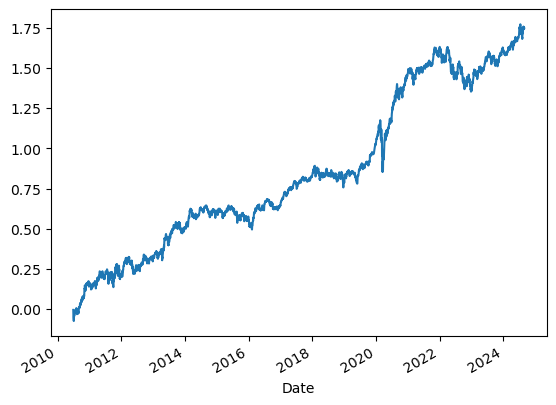

In [23]:
ret_df.dot(opt_W).cumsum().plot()

In [24]:
ret_df.dot(opt_W).cumsum()

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-08-26    1.752765
2024-08-27    1.750762
2024-08-28    1.743364
2024-08-29    1.747530
2024-08-30         NaN
Length: 3691, dtype: float64

In [25]:
ret_df.dot(W).cumsum()

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2024-08-26    2.130968
2024-08-27    2.125608
2024-08-28    2.118845
2024-08-29    2.124392
2024-08-30         NaN
Length: 3691, dtype: float64

In [54]:
sharpe_pf(opt_W,ret_df)

-0.05045330253907179

In [56]:
sharpe_pf(W,ret_df)

-0.04631583087096563

In [58]:
1-np.arange(0,1,0.01) #counter-weights

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [60]:
sharpes=[]

for w in np.arange(0,1,0.01):
    weights = w,1-w #### ?????? 4 assets now!
    weights = np.array(weights)
    print(weights)
    sharpes.append(sharpe_pf(weights,ret_df))

[0. 1.]


ValueError: shapes (2,) and (4,4) not aligned: 2 (dim 0) != 4 (dim 0)

In [64]:
pd.Series(sharpes)

Series([], dtype: object)

In [66]:
pd.Series(sharpes).plot()

TypeError: no numeric data to plot

In [68]:
pd.Series(sharpes).nsmallest(1)

TypeError: Cannot use method 'nsmallest' with dtype object

In [72]:
np.arange(0,1,0.01)[38] #imp....****

0.38

In [74]:
#####splitting the dataset

In [76]:
train = ret_df[:int(len(ret_df) * 0.7)]

In [100]:
train

Ticker,GC=F,MMM,TSLA,^GSPC
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000358,-0.006284,NaN,0.003111
2010-01-06,0.015795,0.014082,NaN,0.000545
2010-01-07,-0.002468,0.000717,NaN,0.003993
2010-01-08,0.004491,0.007022,NaN,0.002878
...,...,...,...,...
2020-04-01,-0.003290,-0.024997,-0.084461,-0.045146
2020-04-02,0.029654,0.035200,-0.057899,0.022573
2020-04-03,0.004909,-0.030330,0.054675,-0.015253


In [78]:
test = ret_df[int(len(ret_df) * 0.7):]

In [102]:
test

Ticker,GC=F,MMM,TSLA,^GSPC
Date,,,,
2020-04-08,0.000360,0.029908,0.006196,0.033489
2020-04-09,0.041633,-0.008154,0.043079,0.014383
2020-04-13,0.004941,-0.009382,0.127547,-0.010156
2020-04-14,0.006797,0.025226,0.086677,0.030115
2020-04-15,-0.016935,-0.033732,0.027702,-0.022277
...,...,...,...,...
2024-08-26,0.003701,0.015285,-0.032803,-0.003159
2024-08-27,-0.000675,-0.003419,-0.018939,0.001594
2024-08-28,-0.005980,0.001597,-0.016677,-0.005994


In [84]:
ret_df.dot(opt_W).std()

0.009459568556214883

In [86]:
res_train = minimize(sharpe_pf,W,train,bounds=Bounds(0,1),constraints = cons)

In [106]:
test.dot(res_train['x']).cumsum()

Date
2020-04-08    0.015377
2020-04-09    0.043433
2020-04-13    0.068109
2020-04-14    0.101366
2020-04-15    0.090505
                ...   
2024-08-26    0.793270
2024-08-27    0.789173
2024-08-28    0.781671
2024-08-29    0.786734
2024-08-30         NaN
Length: 1108, dtype: float64

In [104]:
test.dot(W).cumsum()

Date
2020-04-08    0.017488
2020-04-09    0.040224
2020-04-13    0.068461
2020-04-14    0.105665
2020-04-15    0.094354
                ...   
2024-08-26    0.796784
2024-08-27    0.791425
2024-08-28    0.784661
2024-08-29    0.790209
2024-08-30         NaN
Length: 1108, dtype: float64

In [108]:
sharpe_pf(W,test)

-0.05290974641690783

In [110]:
sharpe_pf(res_train['x'],test)

-0.059506833850552686

In [153]:
##### bounds to remove negative weights -> short selling ; in a multi-asset portfolio for instance

In [126]:
res_train['x']#####imp.

array([0.36051182, 0.10024319, 0.21285537, 0.32638962])

In [114]:
train.std()

Ticker
GC=F     0.010228
MMM      0.013367
TSLA     0.034088
^GSPC    0.010899
dtype: float64

In [116]:
train.mean()

Ticker
GC=F     0.000172
MMM      0.000319
TSLA     0.001272
^GSPC    0.000330
dtype: float64

In [118]:
test.std()

Ticker
GC=F     0.009661
MMM      0.017210
TSLA     0.039246
^GSPC    0.011058
dtype: float64

In [120]:
test.mean()

Ticker
GC=F     0.000387
MMM      0.000250
TSLA     0.001566
^GSPC    0.000672
dtype: float64